## NN from scratch // Example 
---

Rodrigo Carvalho - 2019


A simple implementation of a Neural Network to a classification task. The code is implemented and imported from the package 'nnpack' and the common MNIST dataset has been used to benchmark its performance.

### Importing NN package, Numpy and Matplotlib

In [2]:
from nnpack import NN,read_data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data

In [3]:
X_train, Y_train, X_test, Y_test=read_data.load_mnist()

### Starting the NN package

In [4]:
classifier = NN.NN()

Model Initialized
Call .model() to define your NN and .fit(x,y) to start the training process



### Defining the NN model (Layers, units, activation function)

In [5]:
#defining model
units=[10]
activation=['softmax']
classifier.model(units,activation)

number of layers:  1
number of h-units [10]
activation for each layer ['softmax']


### Starting the training process

In [6]:
%%time
history=classifier.fit(X_train,Y_train,lr=0.1,epochs=20,n_batches=600,shuffle=True,test=[X_test,Y_test],init_rand=True)

600 Batches, Epoch  1 -- Cost: 0.364 Acc: 0.890  |-|  Test_Cost: 0.362 | Acc: 0.903
600 Batches, Epoch  2 -- Cost: 0.327 Acc: 0.930  |-|  Test_Cost: 0.328 | Acc: 0.911
600 Batches, Epoch  3 -- Cost: 0.233 Acc: 0.930  |-|  Test_Cost: 0.314 | Acc: 0.914
600 Batches, Epoch  4 -- Cost: 0.336 Acc: 0.860  |-|  Test_Cost: 0.304 | Acc: 0.915
600 Batches, Epoch  5 -- Cost: 0.454 Acc: 0.910  |-|  Test_Cost: 0.298 | Acc: 0.918
600 Batches, Epoch  6 -- Cost: 0.219 Acc: 0.910  |-|  Test_Cost: 0.295 | Acc: 0.917
600 Batches, Epoch  7 -- Cost: 0.246 Acc: 0.950  |-|  Test_Cost: 0.291 | Acc: 0.919
600 Batches, Epoch  8 -- Cost: 0.179 Acc: 0.960  |-|  Test_Cost: 0.288 | Acc: 0.920
600 Batches, Epoch  9 -- Cost: 0.338 Acc: 0.920  |-|  Test_Cost: 0.287 | Acc: 0.921
600 Batches, Epoch 10 -- Cost: 0.247 Acc: 0.920  |-|  Test_Cost: 0.285 | Acc: 0.921
600 Batches, Epoch 11 -- Cost: 0.374 Acc: 0.900  |-|  Test_Cost: 0.282 | Acc: 0.922
600 Batches, Epoch 12 -- Cost: 0.156 Acc: 0.970  |-|  Test_Cost: 0.281 | Acc

### Loss history

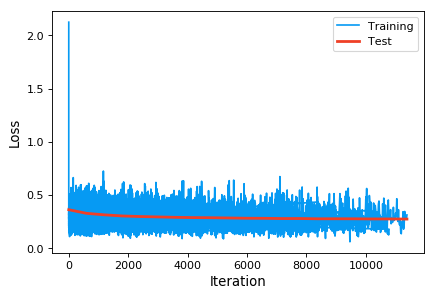

In [14]:
#plot errors hist
plt.figure(dpi=80)
plt.plot(((history['Iterations'])),history['Error'],label='Training',c='xkcd:azure')
plt.plot(((history['Epochs'])),history['TestError'],lw=2.5,label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.show()

### Accuracy

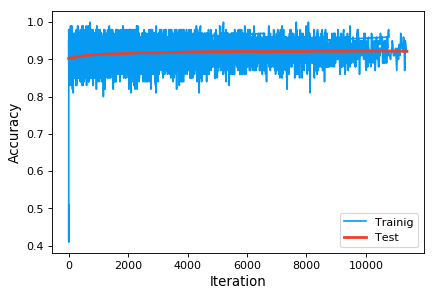

In [15]:
#plot accuracy hist
plt.figure(dpi=80)
plt.plot(((history['Iterations'])),history['Accuracy'],label="Trainig",c='xkcd:azure')
plt.plot(((history['Epochs'])),history['TestAccuracy'],lw=2.5,label="Test",c='xkcd:tomato')
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.show()

#### Final evaluation with training data

In [16]:
#evaluate training
probs=classifier.evaluate(X_train,Y_train)


Loss:  0.27391944091586434
Accuracy:  0.92395 



#### Final evaluation with test data

In [17]:
#evaluating in test data
predictions=classifier.evaluate(X_test,Y_test)

#it is possible to call the "predict method" as well, which do not compute the loss function or accuracy
#predictions=classifier.predict(X_test)


Loss:  0.27441358491074846
Accuracy:  0.9218 



### Visualizing trained parameters

In [18]:
#getting weigths
w,b=classifier.get_w()
w=np.reshape(w,(10,784))

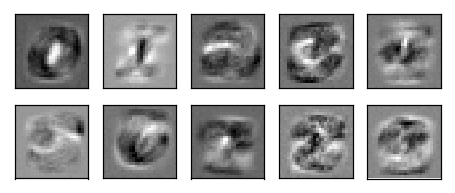

In [19]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows),dpi=110)

for i in range(10):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(w[i].reshape(28,28), cmap=plt.cm.binary)    

plt.show()

### Prediction examples

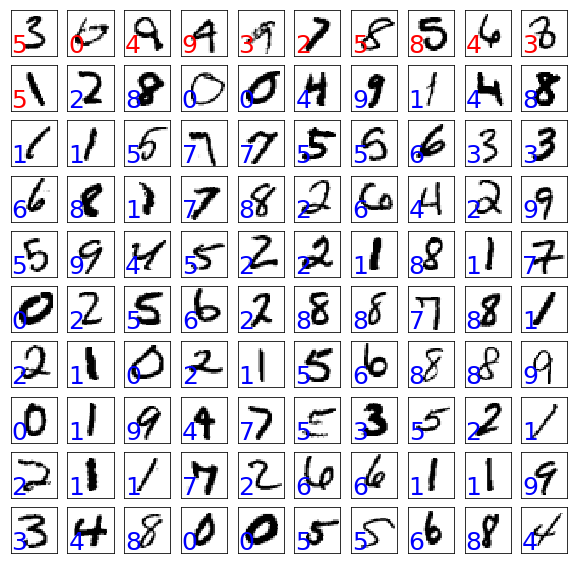

In [20]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.show()


----

# Multilayer model
----

### Starting a new classifier

In [21]:
classifier2=NN.NN()

Model Initialized
Call .model() to define your NN and .fit(x,y) to start the training process



### Defining the model

In [22]:
#defining model
units2=[32,10]
activation2=['relu','softmax']
classifier2.model(units2,activation2)

number of layers:  2
number of h-units [32, 10]
activation for each layer ['relu', 'softmax']


### Training

In [23]:
%%time
history=classifier2.fit(X_train,Y_train,lr=0.01,epochs=20,n_batches=600,test=[X_test,Y_test])

600 Batches, Epoch  1 -- Cost: 2.086 Acc: 0.330  |-|  Test_Cost: 2.051 | Acc: 0.358
600 Batches, Epoch  2 -- Cost: 0.949 Acc: 0.790  |-|  Test_Cost: 0.984 | Acc: 0.759
600 Batches, Epoch  3 -- Cost: 0.668 Acc: 0.810  |-|  Test_Cost: 0.624 | Acc: 0.836
600 Batches, Epoch  4 -- Cost: 0.430 Acc: 0.890  |-|  Test_Cost: 0.496 | Acc: 0.866
600 Batches, Epoch  5 -- Cost: 0.394 Acc: 0.930  |-|  Test_Cost: 0.433 | Acc: 0.883
600 Batches, Epoch  6 -- Cost: 0.460 Acc: 0.870  |-|  Test_Cost: 0.394 | Acc: 0.891
600 Batches, Epoch  7 -- Cost: 0.230 Acc: 0.950  |-|  Test_Cost: 0.369 | Acc: 0.897
600 Batches, Epoch  8 -- Cost: 0.498 Acc: 0.850  |-|  Test_Cost: 0.350 | Acc: 0.902
600 Batches, Epoch  9 -- Cost: 0.307 Acc: 0.880  |-|  Test_Cost: 0.335 | Acc: 0.905
600 Batches, Epoch 10 -- Cost: 0.268 Acc: 0.920  |-|  Test_Cost: 0.324 | Acc: 0.907
600 Batches, Epoch 11 -- Cost: 0.351 Acc: 0.890  |-|  Test_Cost: 0.314 | Acc: 0.912
600 Batches, Epoch 12 -- Cost: 0.210 Acc: 0.940  |-|  Test_Cost: 0.304 | Acc

### Loss

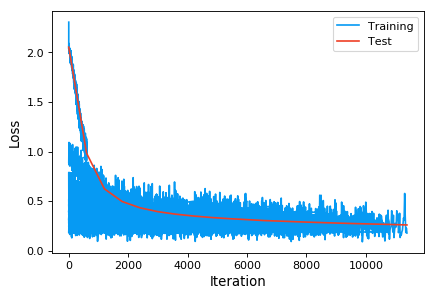

In [25]:
#plot errors hist
plt.figure(dpi=80)
plt.plot(((history['Iterations'])),history['Error'],label='Training',c='xkcd:azure')
plt.plot(((history['Epochs'])),history['TestError'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.show()

### Accuracy

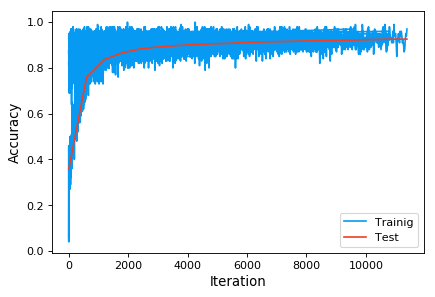

In [26]:
#plot accuracy hist
plt.figure(dpi=80)
plt.plot(((history['Iterations'])),history['Accuracy'],label="Trainig",c='xkcd:azure')
plt.plot(((history['Epochs'])),history['TestAccuracy'],label="Test",c='xkcd:tomato')
plt.ylabel('Accuracy',fontsize=12)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.show()

### Final evaluation with training data

In [27]:
#evaluate training
probs2=classifier2.evaluate(X_train,Y_train)


Loss:  0.2661376339787446
Accuracy:  0.9253833333333333 



### Final evaluation with test data

In [28]:
#evaluating in test data
predictions2=classifier2.evaluate(X_test,Y_test)

#it is possible to call the "predict method" as well, which do not compute the loss function or accuracy
#predictions=classifier.predict(X_test)


Loss:  0.26018734901985413
Accuracy:  0.9261 



### Prediction examples

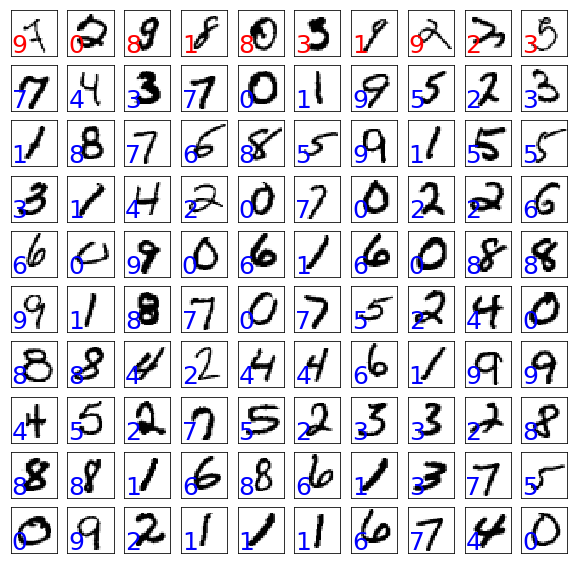

In [29]:
#converting
test_pred = np.argmax(predictions2,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.show()
